## COVID-19 Logistic Model

Jay Urbain, PhD

References:  

Interview
Ari Libsker, Corona Is Slowing Down, Humanity Will Survive, Says Biophysicist Michael Levitt, 3/13/20.  
https://www.calcalistech.com/ctech/articles/0,7340,L-3800632,00.html

Chowell, G., Sattenspiel, L., Bansal, S., & Viboud, C. (2016). Mathematical models to characterize early epidemic growth: A review. Physics of life reviews, 18, 66–97. https://doi.org/10.1016/j.plrev.2016.07.005

2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE   
https://github.com/CSSEGISandData/COVID-19

Exponential growth and epidemics, CDC  
https://www.youtube.com/watch?v=Kas0tIxDvrg

Estimating actual COVID 19 cases (novel corona virus infections) in an area based on deaths, CDC  
https://www.youtube.com/watch?v=mCa0JXEwDEk  

Mathematics of the Corona outbreak – with professor Tom Britton   
https://www.youtube.com/watch?v=gSqIwXl6IjQ

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false
}

<IPython.core.display.Javascript object>

In [2]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [15, 5]
from IPython import display
from ipywidgets import interact, widgets
import seaborn as sns



#### Data

The data is hosted by John Hopkins University:  
https://github.com/CSSEGISandData/COVID-19

time_series_covid19_confirmed_global.csv

There are three files that contain total confirmed cases, deaths and recoveries.

In [3]:
df_confirmed_raw_new=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_confirmed_raw_new.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,237,273,281,299,349,367,423,444,484,521
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,259,277,304,333,361,377,383,400,409,416
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,847,986,1171,1251,1320,1423,1468,1572,1666,1761
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,390,428,439,466,501,525,545,564,583,601
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,8,8,10,14,16,17,19,19,19


In [4]:
# ## Read Data for Cases, Deaths and Recoveries
# df_confirmed_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
# df_deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
# df_recovered_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')


In [5]:
# df_confirmed_raw.head()

#### Data Preprocessing

Unpivot the data

In [6]:
# melt df into correct shape 
# index
def unpivot_data(df_raw):
    df_unpivot=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'], value_name='Cases', var_name='Date')
    df_unpivot['Date'] = pd.to_datetime(df_unpivot['Date'])
    df_unpivot=df_unpivot.set_index(['Date'])
    return df_unpivot 

# Unpivot datasets datasets
# df_confirmed=unpivot_data(df_confirmed_raw)
# df_deaths=unpivot_data(df_deaths_raw)
# df_recovered=unpivot_data(df_recovered_raw)
df_confirmed=unpivot_data(df_confirmed_raw_new)


In [7]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Afghanistan,33.0000,65.0000,0
2020-01-22,NaN,Albania,41.1533,20.1683,0
2020-01-22,NaN,Algeria,28.0339,1.6596,0
2020-01-22,NaN,Andorra,42.5063,1.5218,0
2020-01-22,NaN,Angola,-11.2027,17.8739,0


List countries

In [8]:
np.sort(df_confirmed['Country/Region'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [9]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Afghanistan,33.0000,65.0000,0
2020-01-22,NaN,Albania,41.1533,20.1683,0
2020-01-22,NaN,Algeria,28.0339,1.6596,0
2020-01-22,NaN,Andorra,42.5063,1.5218,0
2020-01-22,NaN,Angola,-11.2027,17.8739,0


In [10]:
df_confirmed[df_confirmed['Country/Region'] == 'France']

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,French Guiana,France,3.9339,-53.1258,0
2020-01-22,French Polynesia,France,-17.6797,149.4068,0
2020-01-22,Guadeloupe,France,16.2500,-61.5833,0
2020-01-22,Mayotte,France,-12.8275,45.1662,0
2020-01-22,New Caledonia,France,-20.9043,165.6180,0
...,...,...,...,...,...
2020-04-10,Saint Barthelemy,France,17.9000,-62.8333,6
2020-04-10,St Martin,France,18.0708,-63.0501,32
2020-04-10,Martinique,France,14.6415,-61.0242,155


In [11]:
df_confirmed[df_confirmed['Country/Region'] == 'United Kingdom']

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,Bermuda,United Kingdom,32.3078,-64.7505,0
2020-01-22,Cayman Islands,United Kingdom,19.3133,-81.2546,0
2020-01-22,Channel Islands,United Kingdom,49.3723,-2.3644,0
2020-01-22,Gibraltar,United Kingdom,36.1408,-5.3536,0
2020-01-22,Isle of Man,United Kingdom,54.2361,-4.5481,0
...,...,...,...,...,...
2020-04-10,NaN,United Kingdom,55.3781,-3.4360,73758
2020-04-10,Anguilla,United Kingdom,18.2206,-63.0686,3
2020-04-10,British Virgin Islands,United Kingdom,18.4207,-64.6400,3


In [12]:
df_confirmed_us = df_confirmed[df_confirmed['Country/Region'] == 'US']
df_confirmed_us

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,US,37.0902,-95.7129,1
2020-01-23,NaN,US,37.0902,-95.7129,1
2020-01-24,NaN,US,37.0902,-95.7129,2
2020-01-25,NaN,US,37.0902,-95.7129,2
2020-01-26,NaN,US,37.0902,-95.7129,5
...,...,...,...,...,...
2020-04-06,NaN,US,37.0902,-95.7129,366667
2020-04-07,NaN,US,37.0902,-95.7129,396223
2020-04-08,NaN,US,37.0902,-95.7129,429052


In [13]:
df_confirmed_us_total = pd.DataFrame(df_confirmed_us.groupby(df_confirmed_us.index)['Cases'].sum(), columns=['Cases'])
df_confirmed_us_total['Country/Region'] = 'US Total'
df_confirmed_us_total[:20]

,Cases,Country/Region
Date,,
2020-01-22,1,US Total
2020-01-23,1,US Total
2020-01-24,2,US Total
2020-01-25,2,US Total
2020-01-26,5,US Total
2020-01-27,5,US Total
2020-01-28,5,US Total
2020-01-29,5,US Total
2020-01-30,5,US Total


In [14]:
df_confirmed = df_confirmed.append(df_confirmed_us_total, sort=False)
df_confirmed

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Afghanistan,33.0000,65.0000,0
2020-01-22,NaN,Albania,41.1533,20.1683,0
2020-01-22,NaN,Algeria,28.0339,1.6596,0
2020-01-22,NaN,Andorra,42.5063,1.5218,0
2020-01-22,NaN,Angola,-11.2027,17.8739,0
...,...,...,...,...,...
2020-04-06,NaN,US Total,NaN,NaN,366667
2020-04-07,NaN,US Total,NaN,NaN,396223
2020-04-08,NaN,US Total,NaN,NaN,429052


#### China Total

In [15]:
df_confirmed_china = df_confirmed[df_confirmed['Country/Region'] == 'China']
df_confirmed_china

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,Anhui,China,31.8257,117.2264,1
2020-01-22,Beijing,China,40.1824,116.4142,14
2020-01-22,Chongqing,China,30.0572,107.8740,6
2020-01-22,Fujian,China,26.0789,117.9874,1
2020-01-22,Gansu,China,37.8099,101.0583,0
...,...,...,...,...,...
2020-04-10,Tianjin,China,39.3054,117.3230,183
2020-04-10,Tibet,China,31.6927,88.0924,1
2020-04-10,Xinjiang,China,41.1129,85.2401,76


In [16]:
df_confirmed_china_total = pd.DataFrame(df_confirmed_china.groupby(df_confirmed_china.index)['Cases'].sum(), columns=['Cases'])
df_confirmed_china_total['Country/Region'] = 'China Total'
df_confirmed_china_total[:20]

,Cases,Country/Region
Date,,
2020-01-22,548,China Total
2020-01-23,643,China Total
2020-01-24,920,China Total
2020-01-25,1406,China Total
2020-01-26,2075,China Total
2020-01-27,2877,China Total
2020-01-28,5509,China Total
2020-01-29,6087,China Total
2020-01-30,8141,China Total


In [17]:
df_confirmed = df_confirmed.append(df_confirmed_china_total)
df_confirmed

/Users/jayurbain/anaconda3/envs/pytorch_rl/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Cases,Country/Region,Lat,Long,Province/State
Date,,,,,
2020-01-22,0,Afghanistan,33.0000,65.0000,NaN
2020-01-22,0,Albania,41.1533,20.1683,NaN
2020-01-22,0,Algeria,28.0339,1.6596,NaN
2020-01-22,0,Andorra,42.5063,1.5218,NaN
2020-01-22,0,Angola,-11.2027,17.8739,NaN
...,...,...,...,...,...
2020-04-06,82665,China Total,NaN,NaN,NaN
2020-04-07,82718,China Total,NaN,NaN,NaN
2020-04-08,82809,China Total,NaN,NaN,NaN


Cap date range to today to eliminate spurious data

In [18]:
from datetime import date
max_date = date.today()
max_date

datetime.date(2020, 4, 11)

In [19]:
df_confirmed.index.values.max(), df_confirmed.index.values.min()

(numpy.datetime64('2020-04-10T00:00:00.000000000'),
 numpy.datetime64('2020-01-22T00:00:00.000000000'))

In [20]:
df_confirmed[df_confirmed['Country/Region']=='US'].index.values.max(), df_confirmed.index.values.min()

(numpy.datetime64('2020-04-10T00:00:00.000000000'),
 numpy.datetime64('2020-01-22T00:00:00.000000000'))

In [21]:
min_date_string = np.datetime_as_string(df_confirmed.index.values.min(), unit='D')
max_date_string = np.datetime_as_string(df_confirmed.index.values.max(), unit='D')

In [22]:
df_confirmed.head()

,Cases,Country/Region,Lat,Long,Province/State
Date,,,,,
2020-01-22,0,Afghanistan,33.0000,65.0000,NaN
2020-01-22,0,Albania,41.1533,20.1683,NaN
2020-01-22,0,Algeria,28.0339,1.6596,NaN
2020-01-22,0,Andorra,42.5063,1.5218,NaN
2020-01-22,0,Angola,-11.2027,17.8739,NaN


#### US Confirmed Cases

Total and percent change

In [23]:
min_cases = 50

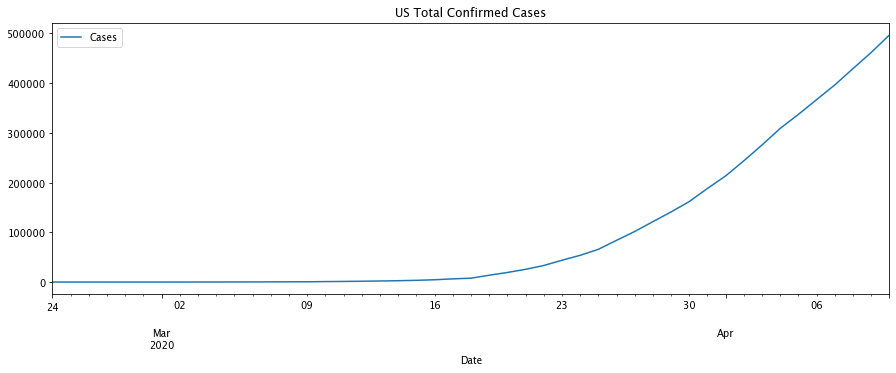

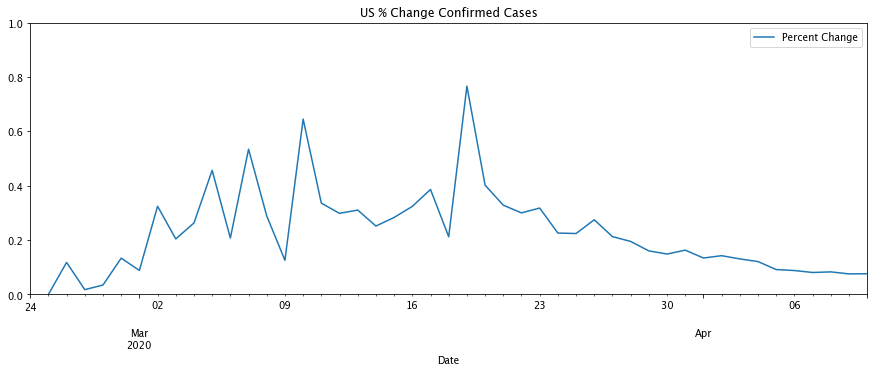

In [24]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'US Total') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='US Total Confirmed Cases')
plt.show()
df_country['Cases'].pct_change().to_frame('Percent Change').plot(title='US % Change Confirmed Cases', ylim=(0,1.0)); 


#### US Polyfit,  Median Filter,  % Change, Testing

US Testing data

In [25]:
df_state_raw = pd.read_csv('/Users/jayurbain/Dropbox/covid19_jay/covid19/data/us-daily.csv')
df_us_testing=df_state_raw.set_index(['date'])
df_us_testing

,states,positive,negative,posNeg,pending,death,total
date,,,,,,,
20200304,14,118,748,866,103,NaN,969
20200305,24,176,971,1147,197,NaN,1344
20200306,36,223,1617,1840,458,NaN,2298
20200307,51,341,1863,2204,602,NaN,2806
20200308,51,417,2437,2854,347,NaN,3201
20200309,51,584,3500,4084,313,NaN,4397
20200310,51,778,3807,4585,469,NaN,4889
20200311,51,1053,5978,7031,563,27.0,7617
20200312,51,1315,7950,9265,673,36.0,9873


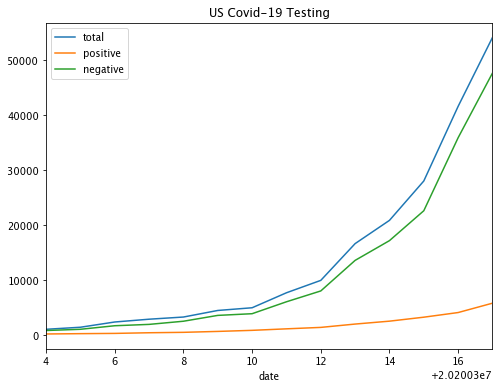

In [26]:
df_us_testing[['total','positive','negative']].plot(figsize=(8,6), title='US Covid-19 Testing');

In [27]:
df = df_country['Cases'].pct_change().to_frame('Percent Change').reset_index()[1:]
df
x = df.index
y = df['Percent Change']
# print(x, y)
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
p

poly1d([ 4.17558643e-07, -1.66386605e-05, -1.04775933e-03,  4.56911609e-02,
       -5.23233268e-02])

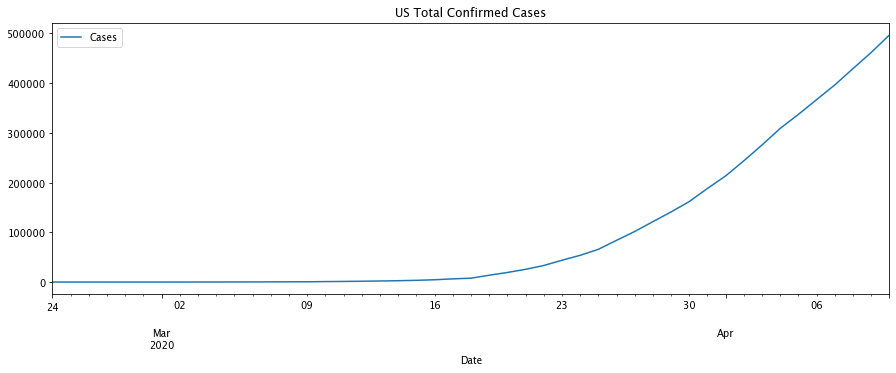

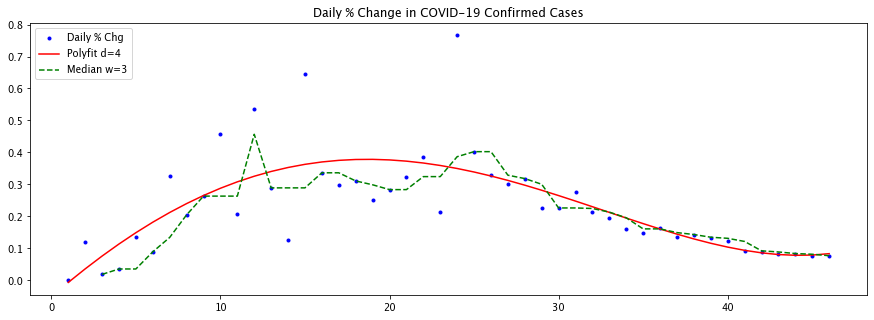

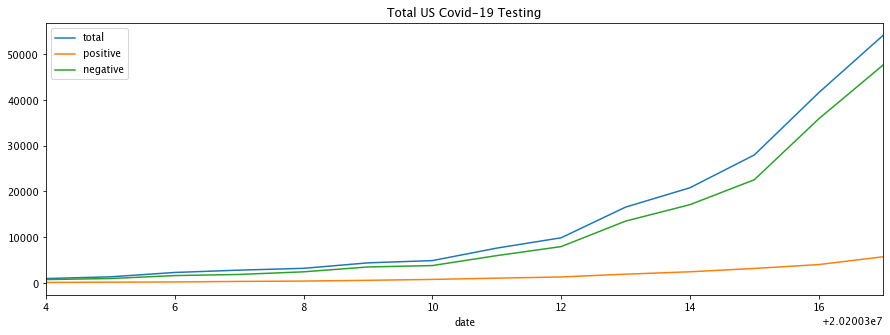

In [28]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'US Total') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='US Total Confirmed Cases')

ma = y.rolling(window=3).median()
fig, ax = plt.subplots()
ax.set_title('Daily % Change in COVID-19 Confirmed Cases')
ax.plot(x, y, '.b', label='Daily % Chg')
ax.plot(x, p(x), '-r', label='Polyfit d=4')
ax.plot(x, ma, '--g', label='Median w=3')
leg = ax.legend(loc='upper left', frameon=True);
plt.show()

df_us_testing[['total','positive','negative']].plot(title='Total US Covid-19 Testing');


#### China Confirmed Cases

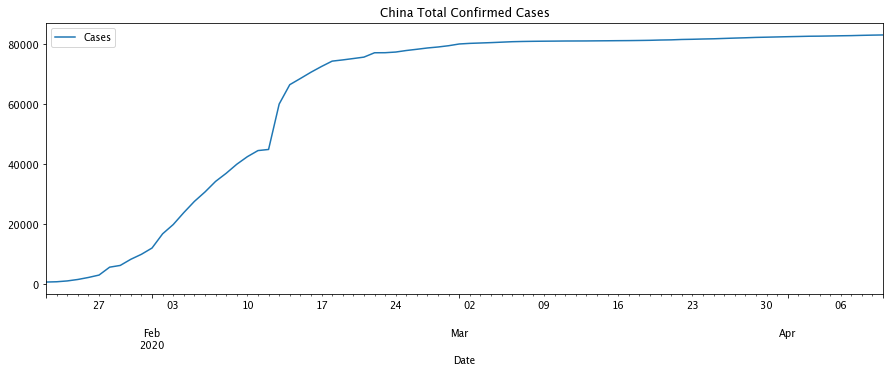

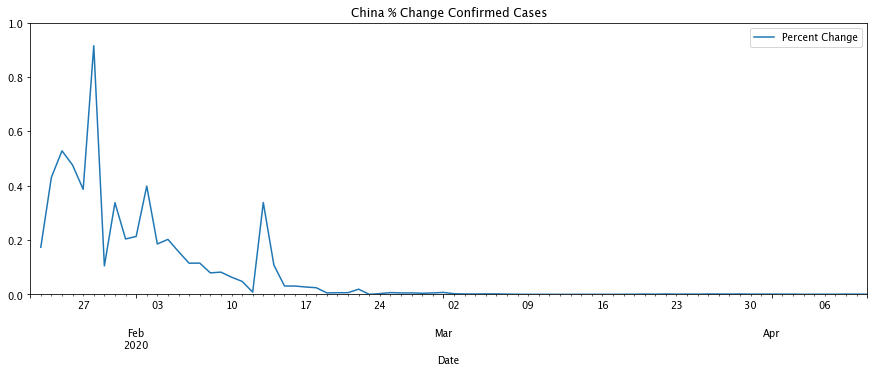

In [29]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'China Total') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='China Total Confirmed Cases')

plt.show()

df_country['Cases'].pct_change().to_frame('Percent Change').plot(title='China % Change Confirmed Cases', ylim=(0,1.0)); 


#### China Polyfit and Median Filter % Change

In [30]:
df = df_country['Cases'].pct_change().to_frame('Percent Change').reset_index()[1:]
df
x = df.index
y = df['Percent Change']
# print(x, y)
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
p

poly1d([-2.86776939e-11, -3.48271524e-06,  5.78125989e-04, -3.06158988e-02,
        5.14074661e-01])

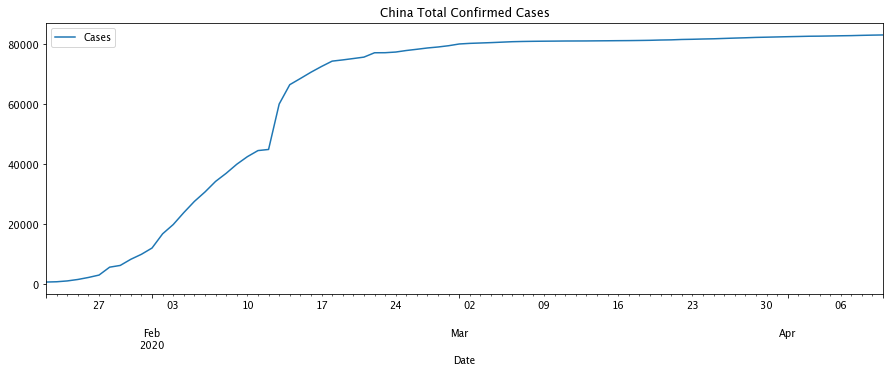

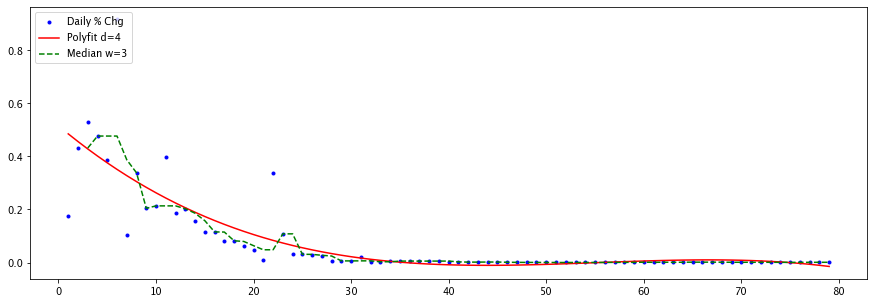

In [31]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'China Total') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='China Total Confirmed Cases')

ma = y.rolling(window=3).median()
fig, ax = plt.subplots()
ax.plot(x, y, '.b', label='Daily % Chg')
ax.plot(x, p(x), '-r', label='Polyfit d=4')
ax.plot(x, ma, '--g', label='Median w=3')
# ax.axis('equal')
leg = ax.legend(loc='upper left', frameon=True);

#### South Korea Confirmed Cases

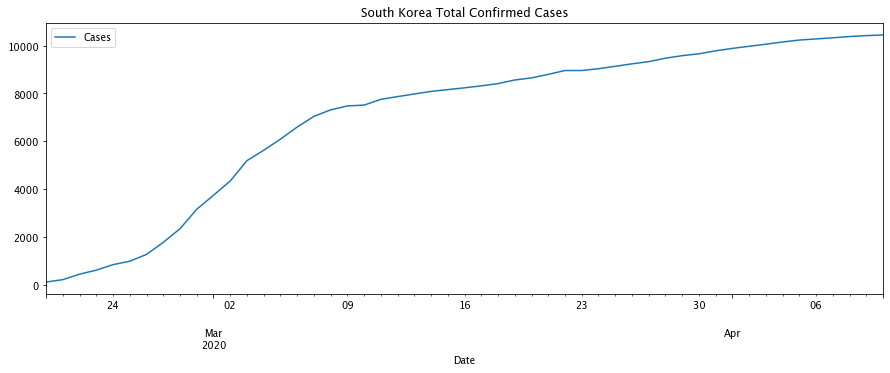

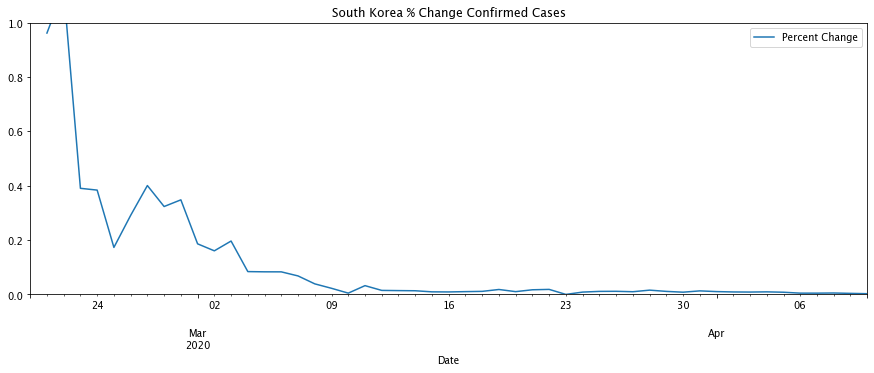

In [32]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='South Korea Total Confirmed Cases')

plt.show()

df_country['Cases'].pct_change().to_frame('Percent Change').plot(title='South Korea % Change Confirmed Cases', ylim=(0,1.0)); 


#### South Korea Polyfit and Median Filter % Change

In [33]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') & (df_confirmed['Cases'] >= min_cases)]

df = df_country['Cases'].to_frame('Cases').reset_index()[1:]
df
x = df.index
y = df['Cases']
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
p

poly1d([ 4.22105775e-03, -2.82599634e-01, -3.11626379e+00,  5.76815948e+02,
       -1.21570932e+03])

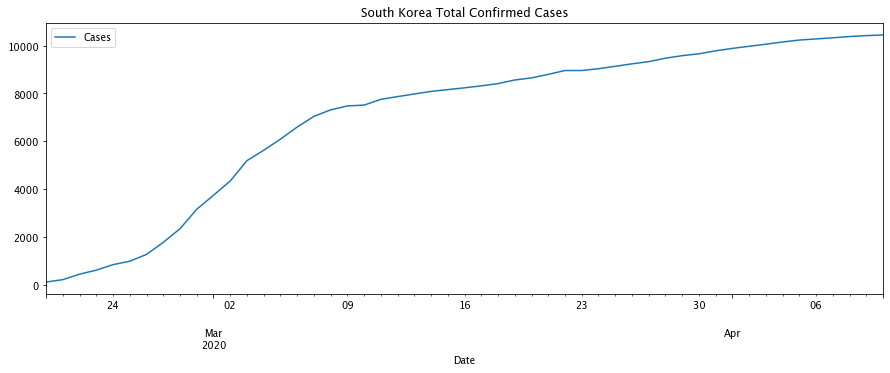

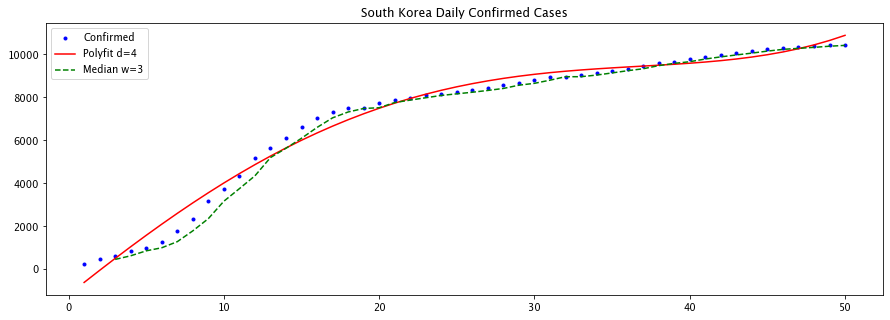

In [34]:
df_country.plot(y='Cases', title='South Korea Total Confirmed Cases')

ma = y.rolling(window=3).median()
fig, ax = plt.subplots()
plt.title('South Korea Daily Confirmed Cases')
ax.plot(x, y, '.b', label='Confirmed')
ax.plot(x, p(x), '-r', label='Polyfit d=4')
ax.plot(x, ma, '--g', label='Median w=3')
# ax.axis('equal')
leg = ax.legend(loc='upper left', frameon=True);



In [35]:
df = df_country['Cases'].pct_change().to_frame('Percent Change').reset_index()[1:]
df
x = df.index
y = df['Percent Change']
# print(x, y)
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
p

poly1d([ 1.26667261e-06, -1.60713892e-04,  7.31304146e-03, -1.41716594e-01,
        1.01021428e+00])

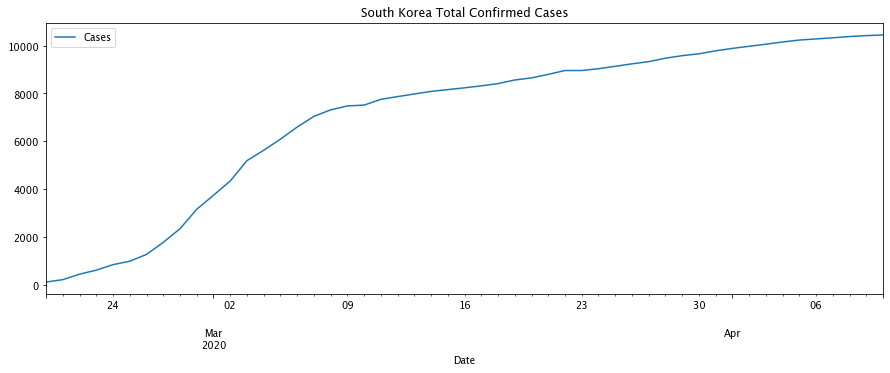

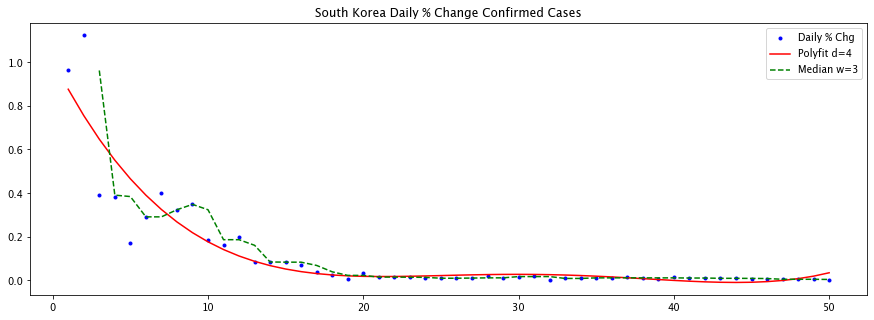

In [36]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='South Korea Total Confirmed Cases')

ma = y.rolling(window=3).median()
fig, ax = plt.subplots()
plt.title('South Korea Daily % Change Confirmed Cases')
ax.plot(x, y, '.b', label='Daily % Chg')
ax.plot(x, p(x), '-r', label='Polyfit d=4')
ax.plot(x, ma, '--g', label='Median w=3')
# ax.axis('equal')
leg = ax.legend(loc='upper right', frameon=True);

## Logistic Modeling

The logistic model has been widely used to describe population growth such as the spread of a virus through the population. 

$$
f(x,a,b,c) = \dfrac{c}{1 + e^{-(x-b)/a}}
$$

- $x$ = time (days)
- $a$ = infection speed
- $b$ = inflection point (days), day with max rate of new infections 
- $c$ = total number of recorded infected people at the end

The number of infected people eventually gets close $c$ where the infection has ended. 

The inflection point $b$, is the point at which the rate of infection starts to decrease (max first derivative).

A plot of a generic logistic function is shown below.

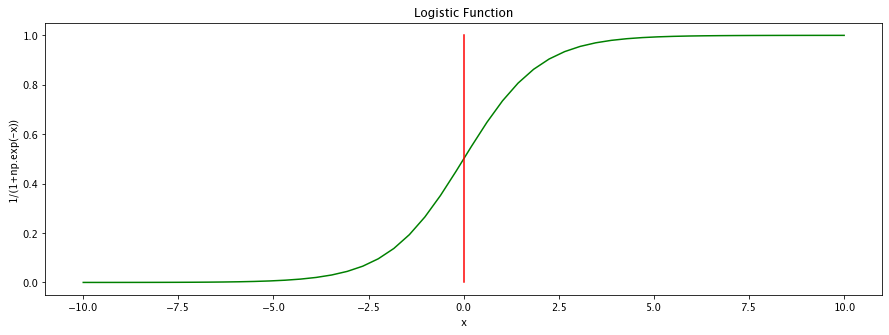

In [37]:
x = np.linspace(-10, 10)
y = 1/(1+np.exp(-x))
plt.plot(x,y, color="green")
# plt.plot(x, [0.5]*50, color="red")
plt.plot(np.array([0,0]), np.array([0,1]), color="red")
plt.title("Logistic Function")
plt.xlabel("x")
plt.ylabel("1/(1+np.exp(-x))")
plt.show()


The rate of infection increases rapidly until it reaches an inflection point shown by the intersection of the red line. Then eventually levels off.

In [38]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

#### Curve fit using South Korea

In [40]:
min_cases=0
df_sk = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') & (df_confirmed['Cases'] >= min_cases)]
df_sk

,Cases,Country/Region,Lat,Long,Province/State
Date,,,,,
2020-01-22,1,"Korea, South",36.0,128.0,NaN
2020-01-23,1,"Korea, South",36.0,128.0,NaN
2020-01-24,2,"Korea, South",36.0,128.0,NaN
2020-01-25,2,"Korea, South",36.0,128.0,NaN
2020-01-26,3,"Korea, South",36.0,128.0,NaN
...,...,...,...,...,...
2020-04-06,10284,"Korea, South",36.0,128.0,NaN
2020-04-07,10331,"Korea, South",36.0,128.0,NaN
2020-04-08,10384,"Korea, South",36.0,128.0,NaN


In [41]:
df = df_sk['Cases'].to_frame('Cases').reset_index()[:]
df
x = df.index
y = df['Cases']
fit = curve_fit(logistic_model,x,y,p0=[2,100,15000])

Below `popt` contains the learned parameters, a, b, c. `pcov` is the covariance matrix, whose diagonal values are the variances of the parameters.

In [42]:
popt = fit[0] # optimized parameters
pcov = fit[1] # covariance matrix
           
a = popt[0]
b = popt[1]
c = popt[2]

In [43]:
print("a =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)
print("c =", popt[2], "+/-", pcov[2,2]**0.5)

a = 4.475760355842862 +/- 0.2298732931955994
b = 41.514174243868176 +/- 0.26848388278462887
c = 9555.627203315993 +/- 92.98467521991896


The square root of the variances provides the Standard Error for each learned parameter, a, b, and c respectively.

In [44]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
errors

[0.2298732931955994, 0.26848388278462887, 92.98467521991896]

In [45]:
print('Expected number of infected people at infection end:', round(c,2), '+/-', round(errors[2],2))
print('Infection peak in days from start:', round(b,2), '+/-', round(errors[1],2))
      

Expected number of infected people at infection end: 9555.63 +/- 92.98
Infection peak in days from start: 41.51 +/- 0.27


In [46]:
import numpy as np
infection_peak_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(b,2)),'D')
infection_peak_date

numpy.datetime64('2020-03-03T00:00:00.000000000')

In [47]:
infection_peak_date_string = np.datetime_as_string(infection_peak_date, unit='D')
infection_peak_date_string

'2020-03-03'

Calculate infection end day as the day at which the cumulative total infected count is equal to the `c` parameter.

The model can be used with Scipy fsolve function which will find the root of the equation that defines the infection end day.

In [48]:
d = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
d

84

In [49]:
infection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(d,2)),'D')

infection_end_date_string = np.datetime_as_string(infection_end_date, unit='D')
infection_end_date_string

'2020-04-15'

#### Plot fitted logistic function with actual data

In [50]:
min_date = np.datetime_as_string(df_confirmed.index.values.min(), unit='D')
min_date

'2020-01-22'

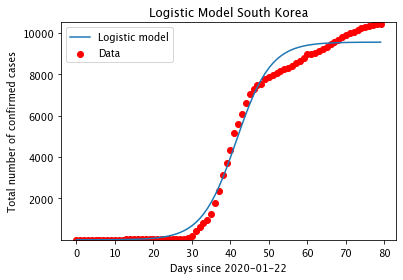

In [51]:
plt.scatter(x, y, color="red", label="Data")

# Fitted logistic curve
plt.plot(x, [logistic_model(i, popt[0], popt[1], popt[2]) for i in x], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.ylim((min(y)*0.9,c*1.1))
plt.title('Logistic Model South Korea')
plt.show()

#### Summary South Korea Model

In [52]:
df = df_sk['Cases'].to_frame('Cases').reset_index()[:]
df
x_sk = df.index
y_sk = df['Cases']
fit = curve_fit(logistic_model,x_sk,y_sk,p0=[2,25,300000])

popt_sk = fit[0] # optimized parameters
pcov_sk = fit[1] # covariance matrix
           
a = popt_sk[0]
b = popt_sk[1]
c = popt_sk[2]

print("a =", popt_sk[0], "+/-", pcov_sk[0,0]**0.5)
print("b =", popt_sk[1], "+/-", pcov_sk[1,1]**0.5)
print("c =", popt_sk[2], "+/-", pcov_sk[2,2]**0.5)

errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
print('errors', errors)

print('Expected number of infected people at infection end:', round(c,2), '+/-', round(errors[2],2))
print('Infection peak in days from start:', round(b,2), '+/-', round(errors[1],2))

infection_peak_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(b,2)),'D')
print('infection_peak_date',infection_peak_date)

infection_peak_date_string = np.datetime_as_string(infection_peak_date, unit='D')
print('infection_peak_date_string')

d = int(fsolve(lambda x_sk : logistic_model(x_sk,a,b,c) - int(c),b))
print('days end', d)

infection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(d,2)),'D')

infection_end_date_string = np.datetime_as_string(infection_end_date, unit='D')
print('infection_end_date_string', infection_end_date_string)


a = 4.475702045354413 +/- 0.2298684111021165
b = 41.51411551533775 +/- 0.26847769619629835
c = 9555.61055236164 +/- 92.98305643868942
errors [0.2298684111021165, 0.26847769619629835, 92.98305643868942]
Expected number of infected people at infection end: 9555.61 +/- 92.98
Infection peak in days from start: 41.51 +/- 0.27
infection_peak_date 2020-03-03T00:00:00.000000000
infection_peak_date_string
days end 84
infection_end_date_string 2020-04-15


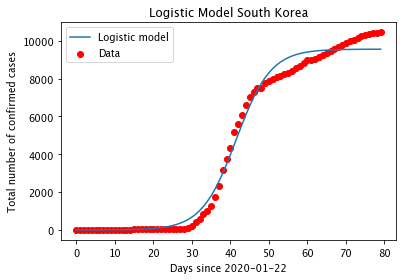

In [53]:
plt.scatter(x_sk, y_sk, color="red", label="Data")

# Fitted logistic curve
plt.plot(x_sk, [logistic_model(i, popt_sk[0], popt_sk[1], popt_sk[2]) for i in x_sk], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('Logistic Model South Korea')
plt.savefig('Logistic Model South Korea.png')

plt.show()

#### SK Piecewise Model

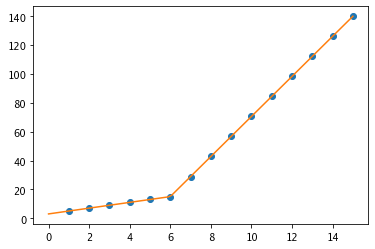

In [54]:
def quadratic_model(x, a, b, c):
    return a*pow(x,2) + b*x + c

from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15], dtype=float)
y = np.array([5, 7, 9, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 84.47, 98.36, 112.25, 126.14, 140.03])

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, 15, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p));

In [55]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

def quadratic_model(x, a, b, c):
    return a*pow(x,2) + b*x + c

def piecewise_nonlinear(x, day, a, b, c):
    return np.piecewise(x, [x < day], [lambda x:c/(1+np.exp(-(x-b)/a)), lambda x:a*pow(x,2) + b*x + c])

df = df_sk['Cases'].to_frame('Cases').reset_index()[:]
df
x_sk = df.index
y_sk = df['Cases']

day=50
popt_logistic_sk , popv_logistic_sk = optimize.curve_fit(logistic_model, x_sk[:day], y_sk[:day])
print(popt_logistic_sk , popv_logistic_sk)

popt_quadratic_sk , popv_quadratic_sk = optimize.curve_fit(quadratic_model, x_sk[day:], y_sk[day:])
print(popt_quadratic_sk , popv_quadratic_sk)


[2.80978373e+00 3.94081676e+01 7.94804275e+03] [[1.47519025e-03 1.25175593e-03 1.23072719e+00]
 [1.25175593e-03 2.80354243e-03 1.92630249e+00]
 [1.23072719e+00 1.92630249e+00 1.90280620e+03]]
[ -0.7040114  185.37586902 306.46206897] [[ 1.95768496e-02 -2.52541401e+00  7.99779677e+01]
 [-2.52541401e+00  3.26947850e+02 -1.03925852e+04]
 [ 7.99779677e+01 -1.03925852e+04  3.31689265e+05]]


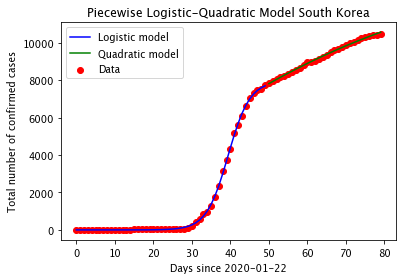

In [56]:
plt.scatter(x_sk, y_sk, color="red", label="Data")

# Fitted logistic curve
plt.plot(x_sk[:day], [logistic_model(i, popt_logistic_sk[0], popt_logistic_sk[1], popt_logistic_sk[2]) for i in x_sk[:day]], label="Logistic model", color="blue")
plt.plot(x_sk[day:], [quadratic_model(i, popt_quadratic_sk[0], popt_quadratic_sk[1], popt_quadratic_sk[2]) for i in x_sk[day:]], label="Quadratic model", color="green" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('Piecewise Logistic-Quadratic Model South Korea')
plt.savefig('Piecewise Logistic-Quadratic Model South Korea.png')

plt.show()


#### SK Scaled Model US

In [57]:
df_confirmed.loc[(df_confirmed['Country/Region'] == 'US')].head()


,Cases,Country/Region,Lat,Long,Province/State
Date,,,,,
2020-01-22,1,US,37.0902,-95.7129,NaN
2020-01-23,1,US,37.0902,-95.7129,NaN
2020-01-24,2,US,37.0902,-95.7129,NaN
2020-01-25,2,US,37.0902,-95.7129,NaN
2020-01-26,5,US,37.0902,-95.7129,NaN


In [58]:
min_cases = 0
df_us = df_confirmed.loc[(df_confirmed['Country/Region'] == 'US') & (df_confirmed['Cases'] >= min_cases)]
df_us = df_us['Cases'].to_frame('Cases').reset_index()[:]
df_us

,Date,Cases
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5
...,...,...
75,2020-04-06,366667
76,2020-04-07,396223
77,2020-04-08,429052
78,2020-04-09,461437


In [59]:
pop_dict = {'US Total':331002651,
    'Japan':126476461,
    'Germany':83783942,
    'United Kingdom':67886011,
    'France':6273511,
    'Italy':60461826,
    'Korea, South':51269185,
    'Spain':46754778,
    'Argentina':45195774,
    'Canada':37742154,
    'Australia':25499884,
    'Taiwan':23816775,
    'Iran':8992949,
    'Brazil':209469333,
    'Colombia':49648685,
    'Mexico':126190788,
    'China':1439323776,
    'China Hubei':75600000
}

In [60]:
us_sk_pop_factor = pop_dict['US Total']/pop_dict['Korea, South']
us_sk_pop_factor

6.45617149950794

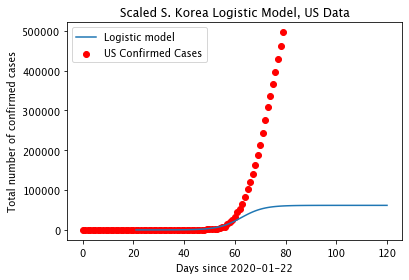

In [61]:
sk_day_offset = 21
x_us = df_us.index
y_us = df_us['Cases']
x_ext = np.arange(100)
plt.scatter(x_us, y_us, color="red", label="US Confirmed Cases")

# Fitted logistic curve
plt.plot(x_ext+sk_day_offset, [logistic_model(i, popt_sk[0], popt_sk[1], popt_sk[2]*us_sk_pop_factor) for i in x_ext], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('Scaled S. Korea Logistic Model, US Data')
plt.savefig('Scaled S. Korea Logistic Model, US Data.png')

plt.show()

#### Logistic Model China

In [62]:
#df_confirmed.loc[(df_confirmed['Country/Region'] == 'China') & (df_confirmed['Province/State'] == 'Hubei')]

In [63]:
min_cases = 0
df_china_hubei = df_confirmed.loc[(df_confirmed['Country/Region'] == 'China') & (df_confirmed['Province/State'] == 'Hubei') & (df_confirmed['Cases'] >= min_cases)]
df_china_hubei = df_china_hubei['Cases'].to_frame('Cases').reset_index()[:]
df_china_hubei


,Date,Cases
0,2020-01-22,444
1,2020-01-23,444
2,2020-01-24,549
3,2020-01-25,761
4,2020-01-26,1058
...,...,...
75,2020-04-06,67803
76,2020-04-07,67803
77,2020-04-08,67803
78,2020-04-09,67803


China Hubei Model

In [64]:
df = df_china_hubei['Cases'].to_frame('Cases').reset_index()[:]
df
x_ch_hb = df.index
y_ch_hb = df['Cases']
fit = curve_fit(logistic_model,x_ch_hb,y_ch_hb,p0=[2,25,100000])

popt_ch_hb = fit[0] # optimized parameters
pcov_ch_hb = fit[1] # covariance matrix
           
a = popt_ch_hb[0]
b = popt_ch_hb[1]
c = popt_ch_hb[2]

print("a =", popt_ch_hb[0], "+/-", pcov_ch_hb[0,0]**0.5)
print("b =", popt_ch_hb[1], "+/-", pcov_ch_hb[1,1]**0.5)
print("c =", popt_ch_hb[2], "+/-", pcov_ch_hb[2,2]**0.5)

errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
print('errors', errors)

print('Expected number of infected people at infection end:', round(c,2), '+/-', round(errors[2],2))
print('Infection peak in days from start:', round(b,2), '+/-', round(errors[1],2))

infection_peak_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(b,2)),'D')
print('infection_peak_date',infection_peak_date)

infection_peak_date_string = np.datetime_as_string(infection_peak_date, unit='D')
print('infection_peak_date_string')

d = int(fsolve(lambda x_ch_hb : logistic_model(x_ch_hb,a,b,c) - int(c),b))
print('days end', d)

infection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(d,2)),'D')

infection_end_date_string = np.datetime_as_string(infection_end_date, unit='D')
print('infection_end_date_string', infection_end_date_string)


a = 4.262789617170045 +/- 0.12178403688847592
b = 18.696922427651128 +/- 0.1397612906268883
c = 67756.69337694788 +/- 260.7698185792393
errors [0.12178403688847592, 0.1397612906268883, 260.7698185792393]
Expected number of infected people at infection end: 67756.69 +/- 260.77
Infection peak in days from start: 18.7 +/- 0.14
infection_peak_date 2020-02-09T00:00:00.000000000
infection_peak_date_string
days end 67
infection_end_date_string 2020-03-29


China Hubei Plot

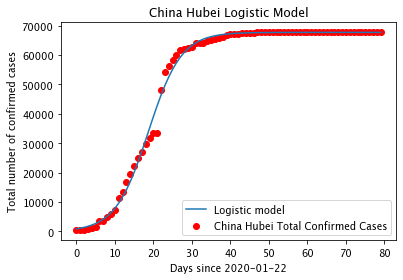

In [65]:
day_offset = 0
x_china = df_china_hubei.index
y_china = df_china_hubei['Cases']
x_ext = x_china
plt.scatter(x_china, y_china, color="red", label="China Hubei Total Confirmed Cases")

# Fitted logistic curve
plt.plot(x_china, [logistic_model(i, popt_ch_hb[0], popt_ch_hb[1], popt_ch_hb[2]*1) for i in x_china], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('China Hubei Logistic Model')
plt.savefig('China Hubei Logistic Model.png')

plt.show()

In [66]:
us_china_hubei_pop_factor = pop_dict['US Total']/pop_dict['China Hubei']
us_china_hubei_pop_factor


4.378341944444444

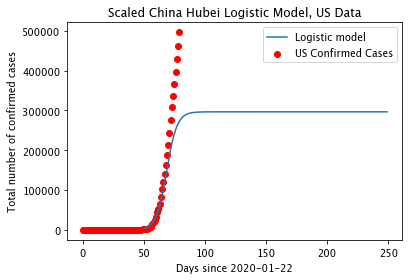

In [67]:
ch_hb_day_offset = 50
x_us = df_us.index
y_us = df_us['Cases']
x_ext = np.arange(200)
plt.scatter(x_us, y_us, color="red", label="US Confirmed Cases")

# Fitted logistic curve
plt.plot(x_ext+ch_hb_day_offset, [logistic_model(i, popt_ch_hb[0], popt_ch_hb[1], popt_ch_hb[2]*us_china_hubei_pop_factor) for i in x_ext], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('Scaled China Hubei Logistic Model, US Data')
plt.savefig('Scaled China Hubei Logistic Model, US Data.png')

plt.show()

Italy Model

In [68]:
min_cases = 0
df_italy = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Italy') & (df_confirmed['Cases'] >= min_cases)]
df_italy = df_italy['Cases'].to_frame('Cases').reset_index()[:]
df_italy


,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
75,2020-04-06,132547
76,2020-04-07,135586
77,2020-04-08,139422
78,2020-04-09,143626


In [69]:
df = df_italy['Cases'].to_frame('Cases').reset_index()[:]
df
x_it = df.index
y_it = df['Cases']
fit = curve_fit(logistic_model,x_it,y_it,p0=[2,25,100000])

popt_it = fit[0] # optimized parameters
pcov_it = fit[1] # covariance matrix
           
a = popt_it[0]
b = popt_it[1]
c = popt_it[2]

print("a =", popt_it[0], "+/-", pcov_it[0,0]**0.5)
print("b =", popt_it[1], "+/-", pcov_it[1,1]**0.5)
print("c =", popt_it[2], "+/-", pcov_it[2,2]**0.5)

errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
print('errors', errors)

print('Expected number of infected people at infection end:', round(c,2), '+/-', round(errors[2],2))
print('Infection peak in days from start:', round(b,2), '+/-', round(errors[1],2))

infection_peak_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(b,2)),'D')
print('infection_peak_date',infection_peak_date)

infection_peak_date_string = np.datetime_as_string(infection_peak_date, unit='D')
print('infection_peak_date_string')

d = int(fsolve(lambda x_it : logistic_model(x_it,a,b,c) - int(c),b))
print('days end', d)

infection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(d,2)),'D')

infection_end_date_string = np.datetime_as_string(infection_end_date, unit='D')
print('infection_end_date_string', infection_end_date_string)

a = 6.2998718721624645 +/- 0.09566220115284839
b = 63.60890095006374 +/- 0.161152010330681
c = 154898.7495188512 +/- 1374.5322378108037
errors [0.09566220115284839, 0.161152010330681, 1374.5322378108037]
Expected number of infected people at infection end: 154898.75 +/- 1374.53
Infection peak in days from start: 63.61 +/- 0.16
infection_peak_date 2020-03-25T00:00:00.000000000
infection_peak_date_string
days end 140
infection_end_date_string 2020-06-10


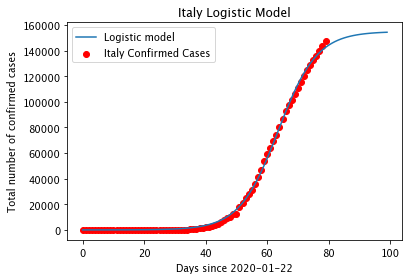

In [70]:
day_offset = 0
x_italy = df_italy.index
y_italy = df_italy['Cases']
x_ext = np.arange(100)
plt.scatter(x_italy, y_italy, color="red", label="Italy Confirmed Cases")

# Fitted logistic curve
plt.plot(x_ext+day_offset, [logistic_model(i, popt_it[0], popt_it[1], popt_it[2]*1) for i in x_ext], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('Italy Logistic Model')
plt.savefig('Italy Logistic Model.png')
plt.show()

In [71]:
us_italy_pop_factor = pop_dict['US Total']/pop_dict['Italy']
us_italy_pop_factor

5.474572517872682

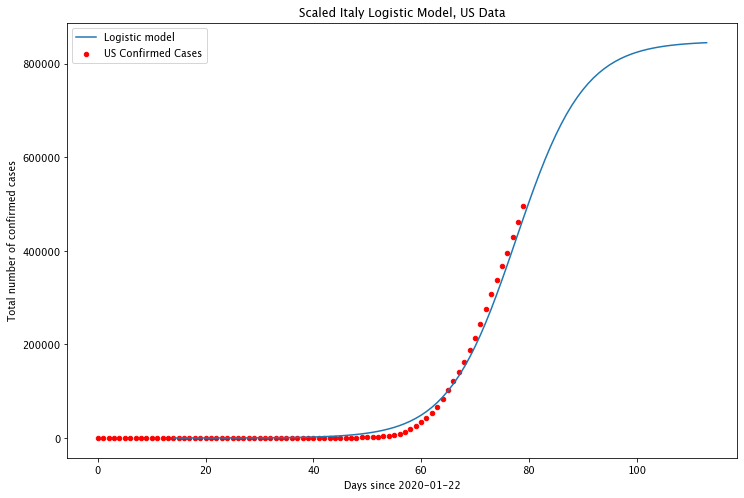

In [72]:
italy_day_offset_day_offset = 14
x_us = df_us.index
y_us = df_us['Cases']
x_ext = np.arange(100)

plt.figure(figsize=(12,8))
plt.scatter(x_us, y_us, color="red", marker='o', s=20, label="US Confirmed Cases")

# Fitted logistic curve
plt.plot(x_ext+italy_day_offset_day_offset, [logistic_model(i, popt_it[0], popt_it[1], popt_it[2]*us_italy_pop_factor) for i in x_ext], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('Scaled Italy Logistic Model, US Data')
plt.savefig('Scaled Italy Logistic Model, US Data.png')
plt.show()

US Model

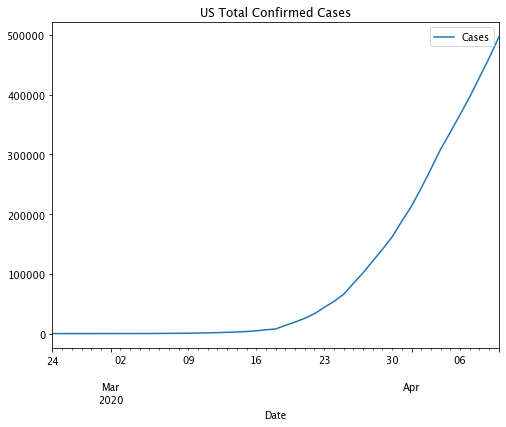

0.07606238771489937


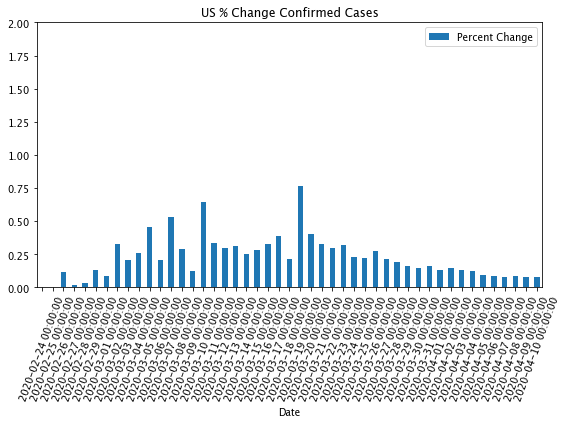

In [73]:
import matplotlib.dates as mdates

min_cases=50
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'US Total') & (df_confirmed['Cases'] >= min_cases) ]
df_country.plot(y='Cases', title='US Total Confirmed Cases', figsize=(8,6))
plt.show()

# fig, ax = plt.subplots(figsize=(8,4), constrained_layout=True)
# degrees = 70
# plt.xticks(rotation=degrees)

# y = df_country['Cases'].pct_change()
# x = [np.datetime64('2020-01-23') + np.timedelta64(i,'D') for i in np.arange(len(y))]

# plt.plot(x, y, 'b-', label="% Change in New Cases" )

# df_country['Cases'].pct_change().to_frame('Percent Change').plot.bar(title='US % Change Confirmed Cases', ylim=(0,1.0), figsize=(8,6), rot=70); 
# plt.savefig('Percent Change US Cases.png')
# plt.show()
# std_10 = df_country[-11:]['Cases'].pct_change()[1:].std()
# print("Standard deviation % change new cases trailing 10 days", round(std_10,2))

# fig, ax = plt.subplots(figsize=(8,4))

df_country['Cases'].pct_change().to_frame('Percent Change').plot.bar(title='US % Change Confirmed Cases', ylim=(0,2.0), figsize=(8,6), rot=70); 
plt.tight_layout()
plt.savefig('Percent Change US Cases.png')
# data.plot(ax=ax)

#set ticks every week
# ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

print( df_country['Cases'].pct_change()[-1])

In [74]:
df = df_us['Cases'].to_frame('Cases').reset_index()[:]
df.head()

,index,Cases
0,0,1
1,1,1
2,2,2
3,3,2
4,4,5


In [75]:
df = df_us['Cases'].to_frame('Cases').reset_index()[:]
df
x_us = df.index
y_us = df['Cases']
fit = curve_fit(logistic_model,x_us,y_us,p0=[2,6,300000])

popt_us = fit[0] # optimized parameters
pcov_us = fit[1] # covariance matrix
           
a = popt_us[0]
b = popt_us[1]
c = popt_us[2]

print("a =", popt_us[0], "+/-", pcov_us[0,0]**0.5)
print("b =", popt_us[1], "+/-", pcov_us[1,1]**0.5)
print("c =", popt_us[2], "+/-", pcov_us[2,2]**0.5)

errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
print('errors', errors)

print('Expected number of infected people at infection end:', round(c,2), '+/-', round(errors[1],2))
print('Infection peak in days from start:', round(b,2), '+/-', round(errors[1],2))

us_inflection_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(b,2)),'D')
print('us_inflection_date',us_inflection_date)

us_inflection_date_string = np.datetime_as_string(us_inflection_date, unit='D')
print('us_inflection_date_string', us_inflection_date_string)

d = int(fsolve(lambda x_it : logistic_model(x_it,a,b,c) - int(c),b))
print('days end', d)

us_inflection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(d,2)),'D')

us_inflection_end_date_string = np.datetime_as_string(us_inflection_end_date, unit='D')
print('infection_end_date_string', infection_end_date_string)

a = 4.772618836598679 +/- 0.06882806240765658
b = 73.18487743769107 +/- 0.17452805545450828
c = 628353.3518867732 +/- 9763.915587780768
errors [0.06882806240765658, 0.17452805545450828, 9763.915587780768]
Expected number of infected people at infection end: 628353.35 +/- 0.17
Infection peak in days from start: 73.18 +/- 0.17
us_inflection_date 2020-04-04T00:00:00.000000000
us_inflection_date_string 2020-04-04
days end 141
infection_end_date_string 2020-06-10


In [76]:
std_10 = df_country[-11:]['Cases'].pct_change()[1:].std()
print("Standard deviation % change new cases trailing 10 days", round(std_10,2))
std_10_factor = popt_us[2]*std_10

Standard deviation % change new cases trailing 10 days 0.03


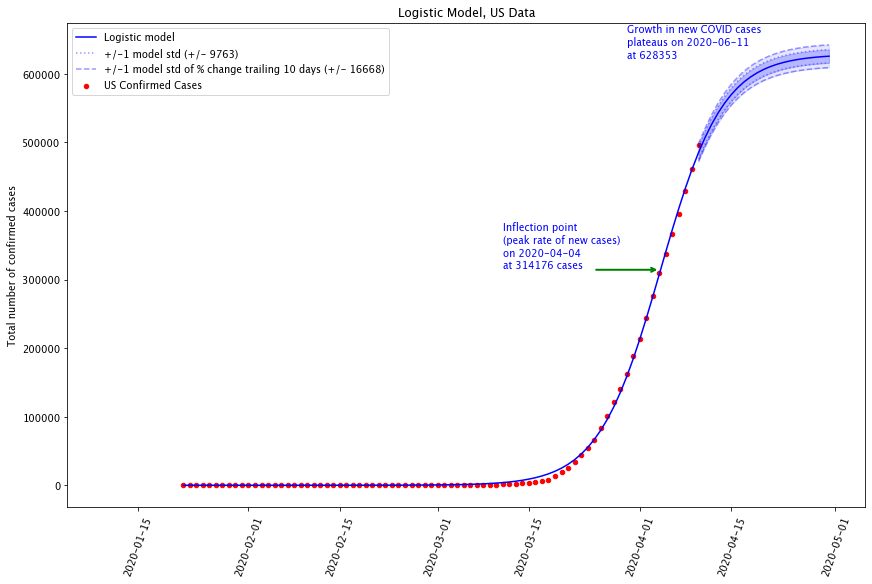

In [77]:
us_day_offset = 0
us_end_offset = len(df_us)
x_us = df_us.index
y_us = df_us['Cases']
x_ext = np.arange(100)
x_ext_offset = np.arange(len(df_us)-1, 100)

fig, ax = plt.subplots(figsize=(12,8), constrained_layout=True)
degrees = 70
plt.xticks(rotation=degrees)

d = [np.datetime64('2020-01-22') + np.timedelta64(i,'D') for i in x_ext if i<len(x_us)]
plt.scatter(d, y_us, color="red", marker='o', s=20, label="US Confirmed Cases")

# Fitted logistic curve
# [np.datetime64('2020-01-22') + np.timedelta64(i,'D') for i in x_ext]

plt.plot([np.datetime64('2020-01-22') + np.timedelta64(i,'D') for i in x_ext], [logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1) for i in x_ext], 'b-', label="Logistic model" )

dd = [np.datetime64('2020-01-22') + np.timedelta64(i,'D') for i in x_ext_offset]
stdcalc = int(pcov_us[2,2]**0.5)
stdlabel = '+/-1 model std (+/- ' + str(stdcalc) + ')'
plt.plot(dd, [logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1)+stdcalc for i in x_ext_offset], 'b:', alpha=.4, label=stdlabel )
plt.plot(dd, [logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1)-stdcalc for i in x_ext_offset], 'b:', alpha=.4 )

plt.fill_between(dd, 
                 [logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1)+stdcalc for i in x_ext_offset], 
                 [logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1)-stdcalc for i in x_ext_offset],
                 color="blue", alpha=.2)

std_10_factor = int(popt_us[2]*std_10)
stdlabel = '+/-1 model std of % change trailing 10 days (+/- ' + str(std_10_factor) + ')'
plt.plot(dd, [logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1)+ (logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1)*std_10) for i in x_ext_offset], 'b--', alpha=.4, label=stdlabel )
plt.plot(dd, [logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1)- (logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1)*std_10) for i in x_ext_offset], 'b--', alpha=.4 )

plt.fill_between(dd, 
                 [logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1)+ (logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1)*std_10) for i in x_ext_offset], 
                 [logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1)- (logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1)*std_10) for i in x_ext_offset],
                 color="blue", alpha=.1)

style = dict(size=10, color='blue')
d = np.datetime_as_string( np.datetime64(us_inflection_date_string))
do = np.datetime_as_string( np.datetime64(us_inflection_date_string) + np.timedelta64(-24,'D') )
ax.text(do, round(popt_us[2]/2*1)+1000, 'Inflection point \n(peak rate of new cases) \non ' + d + '\nat ' + str(int(popt_us[2]/2*1)) + ' cases' , **style)
d = np.datetime_as_string( np.datetime64(us_inflection_end_date_string))
do = np.datetime_as_string( np.datetime64(us_inflection_end_date_string) + np.timedelta64(-73,'D') )
ax.text(do, round(popt_us[2]*1)-6000, 'Growth in new COVID cases \nplateaus on ' + us_inflection_end_date_string + '\nat ' + str(int(popt_us[2]*1)), **style)
# plt.scatter(us_inflection_date, popt_us[2]/2*1, s=100, facecolors='none', edgecolors='red', label="Estimated point of inflection in new cases")
# plt.plot(np.array([us_inflection_date,us_inflection_date]), 
#          np.array([popt_us[2]/2+20000,popt_us[2]/2-20000]), 
#          color="red", label="Estimated point of inflection in new cases")

doia1 = np.datetime_as_string( np.datetime64(us_inflection_date_string) + np.timedelta64(-10,'D') )
doia2 = np.datetime_as_string( np.datetime64(us_inflection_date_string) + np.timedelta64(0,'D') )
ax.annotate('', xy=(doia2,int(popt_us[2]/2*1)+0), xytext=(doia1, int(popt_us[2]/2*1)),
            arrowprops={'arrowstyle': '->', 'color': 'green', 'lw': 2}, va='center', )

plt.legend()
# plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('Logistic Model, US Data')
plt.savefig('US Logistic Model, US Data composite.png')
plt.show()

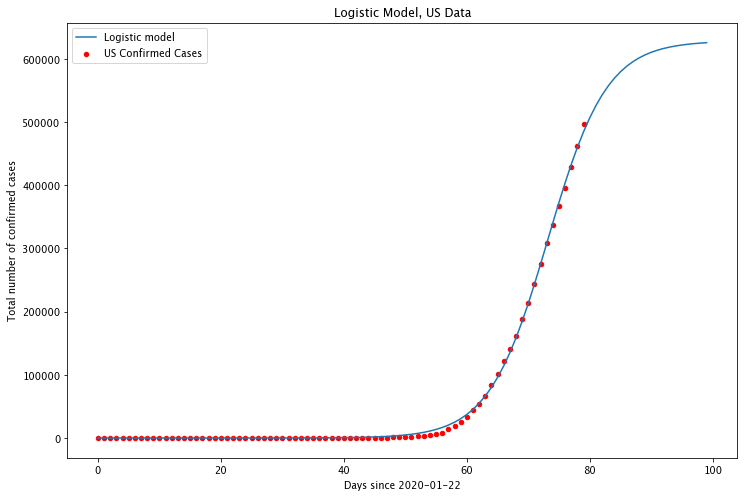

In [78]:
us_day_offset = 0
x_us = df_us.index
y_us = df_us['Cases']
x_ext = np.arange(100)

plt.figure(figsize=(12,8))
plt.scatter(x_us, y_us, color="red", marker='o', s=20, label="US Confirmed Cases")

# Fitted logistic curve
plt.plot(x_ext+us_day_offset, [logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1) for i in x_ext], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('Logistic Model, US Data')
plt.savefig('US Logistic Model, US Data plain.png')
plt.show()

Determine y intercept of % change in new cases to identify inflection day

In [79]:
df_country['Cases'].pct_change()[-20:]

Date
2020-03-22    0.299844
2020-03-23    0.317676
2020-03-24    0.225625
2020-03-25    0.224004
2020-03-26    0.274529
2020-03-27    0.212570
2020-03-28    0.194851
2020-03-29    0.160079
2020-03-30    0.148479
2020-03-31    0.162769
2020-04-01    0.133920
2020-04-02    0.142427
2020-04-03    0.130554
2020-04-04    0.120714
2020-04-05    0.091367
2020-04-06    0.087800
2020-04-07    0.080607
2020-04-08    0.082855
2020-04-09    0.075480
2020-04-10    0.076062
Name: Cases, dtype: float64

In [80]:
pc = df_country['Cases'].pct_change()[1:].values
m = (pc[-2]-pc[-12])/10
m


-0.0072998444115396355

In [81]:
# y = mx + b
b = pc[-11]-m*0
print(b)
# x = (y-b)/m
x = (0-b)/m
x

0.162768567209002


22.297539239561946

In [82]:
np.arange(np.datetime64(df_country.index[-len(y)]), np.datetime64(df_country.index[-1]), np.timedelta64(1,'D'), dtype=np.datetime64) 

array(['2020-03-27T00:00:00.000000', '2020-03-28T00:00:00.000000',
       '2020-03-29T00:00:00.000000', '2020-03-30T00:00:00.000000',
       '2020-03-31T00:00:00.000000', '2020-04-01T00:00:00.000000',
       '2020-04-02T00:00:00.000000', '2020-04-03T00:00:00.000000',
       '2020-04-04T00:00:00.000000', '2020-04-05T00:00:00.000000',
       '2020-04-06T00:00:00.000000', '2020-04-07T00:00:00.000000',
       '2020-04-08T00:00:00.000000', '2020-04-09T00:00:00.000000'],
      dtype='datetime64[us]')

In [83]:
import warnings

# take the last 10 percent change values
ndays = df_country['Cases'].shape[0]
print(ndays)
y = df_country['Cases'].pct_change()[-10:].values
print(y)
x = np.arange(10)
print(x)

# fit a straight line, m and b
z = np.polyfit(x, y, 1)
z

47
[0.13392003 0.14242731 0.13055357 0.12071368 0.09136709 0.08780023
 0.0806072  0.08285486 0.07548036 0.07606239]
[0 1 2 3 4 5 6 7 8 9]


array([-0.00819229,  0.13904396])

In [84]:
z[0]*15 + z[1]

0.01615966193484461

In [85]:
# solve for x when y==0
# y=mx + b
# x = (y-b)/m
inflection_day_from_m10 = (0-z[1])/z[0]
inflection_day_from_m10
int(round(ndays + inflection_day_from_m10 -10))


54

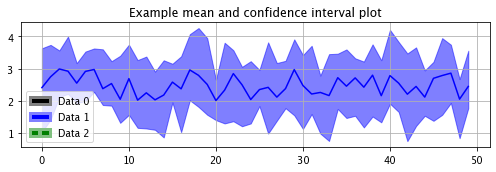

In [86]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import colorConverter as cc
import numpy as np
 
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)
 
# generate 3 sets of random means and confidence intervals to plot
mean0 = np.random.random(50)
ub0 = mean0 + np.random.random(50) + .5
lb0 = mean0 - np.random.random(50) - .5
 
mean1 = np.random.random(50) + 2
ub1 = mean1 + np.random.random(50) + .5
lb1 = mean1 - np.random.random(50) - .5
 
mean2 = np.random.random(50) -1
ub2 = mean2 + np.random.random(50) + .5
lb2 = mean2 - np.random.random(50) - .5
 
# plot the data
fig = plt.figure(1, figsize=(7, 2.5))
plot_mean_and_CI(mean1, ub1, lb1, color_mean='b', color_shading='b')

 
class LegendObject(object):
    def __init__(self, facecolor='red', edgecolor='white', dashed=False):
        self.facecolor = facecolor
        self.edgecolor = edgecolor
        self.dashed = dashed
 
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle(
            # create a rectangle that is filled with color
            [x0, y0], width, height, facecolor=self.facecolor,
            # and whose edges are the faded color
            edgecolor=self.edgecolor, lw=3)
        handlebox.add_artist(patch)
 
        # if we're creating the legend for a dashed line,
        # manually add the dash in to our rectangle
        if self.dashed:
            patch1 = mpatches.Rectangle(
                [x0 + 2*width/5, y0], width/5, height, facecolor=self.edgecolor,
                transform=handlebox.get_transform())
            handlebox.add_artist(patch1)
 
        return patch
 
bg = np.array([1, 1, 1])  # background of the legend is white
colors = ['black', 'blue', 'green']
# with alpha = .5, the faded color is the average of the background and color
colors_faded = [(np.array(cc.to_rgb(color)) + bg) / 2.0 for color in colors]
 
plt.legend([0, 1, 2], ['Data 0', 'Data 1', 'Data 2'],
           handler_map={
               0: LegendObject(colors[0], colors_faded[0]),
               1: LegendObject(colors[1], colors_faded[1]),
               2: LegendObject(colors[2], colors_faded[2], dashed=True),
            })
 
plt.title('Example mean and confidence interval plot')
plt.tight_layout()
plt.grid()
plt.show()

Fit exponential function

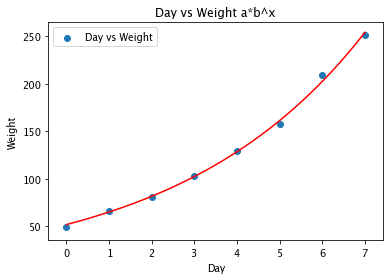

The equation of regression line is y=51.6062*1.2557^x


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

day = np.arange(0,8)
weight = np.sort( np.array([251,209,157,129,103,81,66,49]) )

def func3(x, a, b):
    return a * b ** x
popt, pcov = curve_fit(func3, day, weight, p0=[1, 1e-6])
x_plot=np.linspace(0,7,100)
plt.plot(x_plot, func3(x_plot, *popt), 'r-')
plt.scatter(day,weight,label='Day vs Weight')
plt.title("Day vs Weight a*b^x")
plt.xlabel('Day')
plt.ylabel('Weight')
plt.legend()
plt.show()
# equation
a=popt[0].round(4)
b=popt[1].round(4)
print(f'The equation of regression line is y={a}*{b}^x')

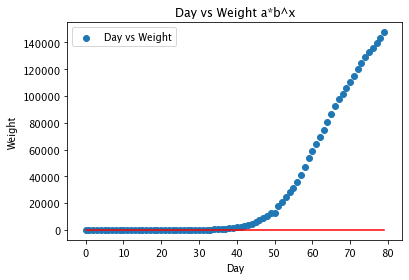

The equation of regression line is y=-0.0*0.0^x


In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

day = np.arange(0,8)
weight = np.sort( np.array([251,209,157,129,103,81,66,49]) )

x_italy = df_italy.index
y_italy = df_italy['Cases']
x_ext = np.arange(100)

def func3(x, a, b):
    return a * b ** x
# popt, pcov = curve_fit(func3, day, weight, p0=[1, 1e-6])
popt, pcov = curve_fit(func3, x_italy, y_italy, p0=[1, 1e-6])
# x_plot=np.linspace(0,7,100)
plt.plot(x_italy, func3(x_italy, *popt), 'r-')
plt.scatter(x_italy,y_italy,label='Day vs Weight')
plt.title("Day vs Weight a*b^x")
plt.xlabel('Day')
plt.ylabel('Weight')
plt.legend()
plt.show()
# equation
a=popt[0].round(4)
b=popt[1].round(4)
print(f'The equation of regression line is y={a}*{b}^x')

In [89]:
print(2*30)
print(2**60)

60
1152921504606846976


In [90]:
st = ''
s = 'Total US Cases South Korea Model ' + str( round(popt_sk[2]*us_sk_pop_factor) )
print(s)
st = s + '\n'
s = 'Total US Cases China Hubei Model ' + str( round(popt_ch_hb[2]*us_china_hubei_pop_factor) )
print(s)
st = st + s + '\n'
s = 'Total US Cases Italy Model ' + str( round(popt_it[2]*us_italy_pop_factor) )
print(s)
st = st + s + '\n'


Total US Cases South Korea Model 61693.0
Total US Cases China Hubei Model 296662.0
Total US Cases Italy Model 848004.0


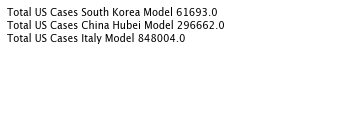

In [91]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,2))
plt.axis([0, 6, 0, 10], fontsize=18, frameon=False)
ax.axis('off')
plt.text(0, 10, st, ha='left', rotation=0, va='top', wrap=True)
plt.savefig('US Covid cases numbers.png')

plt.show()

In [92]:
sk_inflection = 62
sk_inflection_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(sk_inflection,2)),'D')
sk_inflection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(sk_inflection*2,2)),'D')
sk_inflection_date_string = np.datetime_as_string(sk_inflection_date, unit='D')
st = ''
s = 'US Inflection Date South Korea Model' + ' ' + sk_inflection_date_string
st = st + '\n' + s
print(s)
sk_inflection_end_date_string = np.datetime_as_string(sk_inflection_end_date, unit='D')
s = 'US Spread Tail Off Date South Korea Model' + ' ' + sk_inflection_end_date_string
st = st + '\n' + s
print(s)
st = st + '\n' 
print()

ch_hb_inflection = 69
ch_hb_inflection_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(ch_hb_inflection,2)),'D')
ch_hb_inflection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(ch_hb_inflection*2,2)),'D')
ch_hb_inflection_date_string = np.datetime_as_string(ch_hb_inflection_date, unit='D')
s = 'US Inflection Date China Hubei Model' + ' ' + ch_hb_inflection_date_string
st = st + '\n' + s
print(s)
ch_hb_inflection_end_date_string = np.datetime_as_string(ch_hb_inflection_end_date, unit='D')
s = 'US Spread Tail Off Date China Hubei Model' + ' ' + ch_hb_inflection_end_date_string
st = st + '\n' + s
print(s)
st = st + '\n' 
print()

it_inflection = 76
it_inflection_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(it_inflection,2)),'D')
it_inflection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(it_inflection*2,2)),'D')
it_inflection_end_date_string = np.datetime_as_string(it_inflection_end_date, unit='D')
it_inflection_date_string = np.datetime_as_string(it_inflection_date, unit='D')
s = 'US Inflection Date Italy Model' + ' ' + it_inflection_date_string
st = st + '\n' + s
print(s)
it_inflection_end_date_string = np.datetime_as_string(it_inflection_end_date, unit='D')
s = 'US Inflection Date Italy Model' + ' ' + it_inflection_end_date_string
st = st + '\n' + s
print(s)
st = st + '\n' 
print()


US Inflection Date South Korea Model 2020-03-24
US Spread Tail Off Date South Korea Model 2020-05-25

US Inflection Date China Hubei Model 2020-03-31
US Spread Tail Off Date China Hubei Model 2020-06-08

US Inflection Date Italy Model 2020-04-07
US Inflection Date Italy Model 2020-06-22



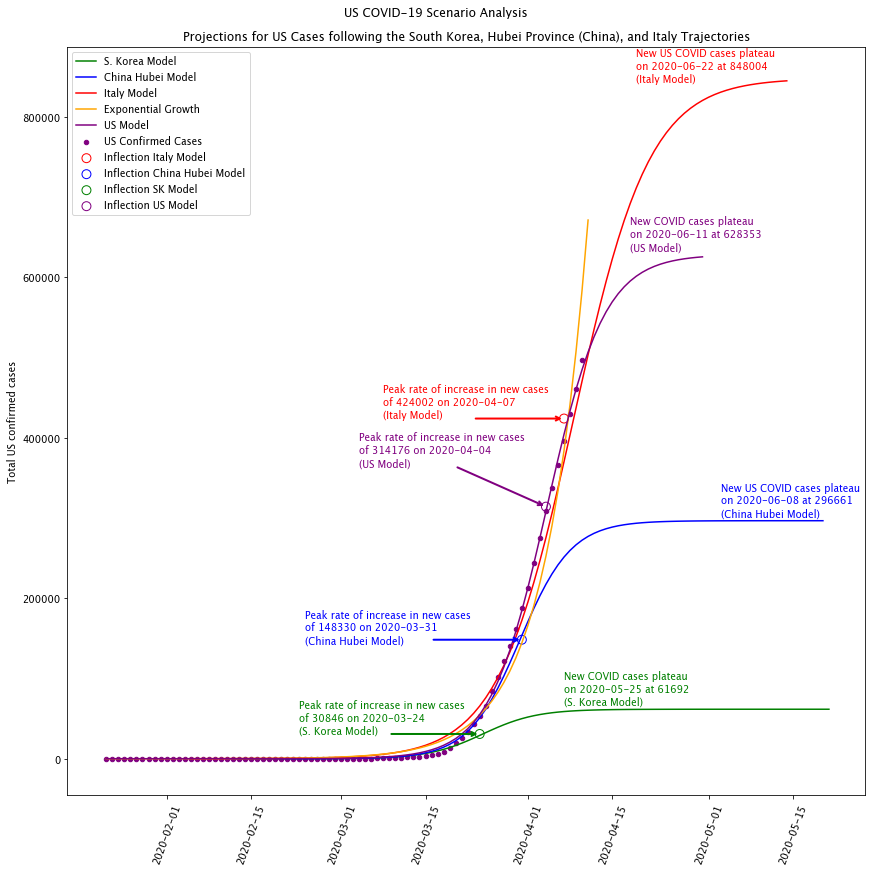

In [93]:
import datetime
from datetime import date
max_date = date.today()
max_date

italy_day_offset_day_offset = 14
x_us = df_us.index
y_us = df_us['Cases']
x_ext = np.arange(100)
x_ext_ch_hb = np.arange(100)-30
x_ext_exp = np.arange(81)

fig, ax = plt.subplots(figsize=(12,12), constrained_layout=True)
# plt.figure(figsize=(16,12))
degrees = 70
plt.xticks(rotation=degrees)

d = [np.datetime64('2020-01-22') + np.timedelta64(i,'D') for i in x_ext if i<len(x_us)]

# Fitted logistic curve
plt.plot([np.datetime64('2020-01-22') + np.timedelta64(i+sk_day_offset,'D') for i in x_ext], [logistic_model(i, popt_sk[0], popt_sk[1], popt_sk[2]*us_sk_pop_factor) for i in x_ext], label="S. Korea Model", color="green")
plt.plot([np.datetime64('2020-01-22') + np.timedelta64(i+ch_hb_day_offset,'D') for i in x_ext_ch_hb], [logistic_model(i, popt_ch_hb[0], popt_ch_hb[1], popt_ch_hb[2]*us_china_hubei_pop_factor) for i in x_ext_ch_hb], label="China Hubei Model", color="blue"  )
plt.plot([np.datetime64('2020-01-22') + np.timedelta64(i+italy_day_offset_day_offset,'D') for i in x_ext], [logistic_model(i, popt_it[0], popt_it[1], popt_it[2]*us_italy_pop_factor) for i in x_ext], label="Italy Model", color="red"  )
plt.plot([np.datetime64('2020-01-22') + np.timedelta64(i,'D') for i in x_ext_exp], 1.15**(x_ext_exp+16), label="Exponential Growth", color="orange" )
plt.scatter(d, y_us, color="purple", marker='o', s=20, label="US Confirmed Cases")

plt.plot([np.datetime64('2020-01-22') + np.timedelta64(i,'D') for i in x_ext], [logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1) for i in x_ext], label="US Model", color="purple"  )

x_text_offset = 10
y_text_offset = 5000

# Italy Model
style = dict(size=10, color='red')
plt.scatter(it_inflection_date, popt_it[2]/2*us_italy_pop_factor, s=80, facecolors='none', edgecolors='r', label='Inflection Italy Model')
do = np.datetime_as_string( np.datetime64(it_inflection_date_string) + np.timedelta64(-30,'D') )
ax.text(do, round(popt_it[2]/2*us_italy_pop_factor), 'Peak rate of increase in new cases \nof ' + str(int(popt_it[2]/2*us_italy_pop_factor)) + ' on '+ it_inflection_date_string + '\n(Italy Model)', **style)
do = np.datetime_as_string( np.datetime64(it_inflection_date_string) + np.timedelta64(12,'D') )
ax.text(do, round(popt_it[2]*us_italy_pop_factor)-5000, 'New US COVID cases plateau\non ' + it_inflection_end_date_string + ' at ' + str(int(popt_it[2]*us_italy_pop_factor)) + '\n(Italy Model)', **style)

doia1 = np.datetime_as_string( np.datetime64(it_inflection_date_string) + np.timedelta64(-15,'D') )
doia2 = np.datetime_as_string( np.datetime64(it_inflection_date_string) + np.timedelta64(0,'D') )
ax.annotate('', xy=(doia2,int(popt_it[2]/2*us_italy_pop_factor)+0), xytext=(doia1, int(popt_it[2]/2*us_italy_pop_factor)),
            arrowprops={'arrowstyle': '->', 'color': 'red', 'lw': 2}, va='center', )

# China Hubei Model
style = dict(size=10, color='blue')
plt.scatter(ch_hb_inflection_date, popt_ch_hb[2]/2*us_china_hubei_pop_factor, s=80, facecolors='none', edgecolors='b', label='Inflection China Hubei Model')
do = np.datetime_as_string( np.datetime64(ch_hb_inflection_date_string) + np.timedelta64(-36,'D') )
ax.text(do, round(popt_ch_hb[2]/2*us_china_hubei_pop_factor)-5000, 'Peak rate of increase in new cases \nof ' + str(int(popt_ch_hb[2]/2*us_china_hubei_pop_factor)) + ' on '+ ch_hb_inflection_date_string + '\n(China Hubei Model)', **style)
do = np.datetime_as_string( np.datetime64(ch_hb_inflection_date_string) + np.timedelta64(33,'D') )
ax.text(do, round(popt_ch_hb[2]*us_china_hubei_pop_factor)+y_text_offset, 'New US COVID cases plateau \non ' + ch_hb_inflection_end_date_string + ' at ' + str(int(popt_ch_hb[2]*us_china_hubei_pop_factor)) + '\n(China Hubei Model)', **style)

doia1 = np.datetime_as_string( np.datetime64(ch_hb_inflection_date_string) + np.timedelta64(-15,'D') )
doia2 = np.datetime_as_string( np.datetime64(ch_hb_inflection_date_string) + np.timedelta64(0,'D') )
ax.annotate('', xy=(doia2,int(popt_ch_hb[2]/2*us_china_hubei_pop_factor)+0), xytext=(doia1, int(popt_ch_hb[2]/2*us_china_hubei_pop_factor)),
            arrowprops={'arrowstyle': '->', 'color': 'blue', 'lw': 2}, va='center', )

# SK Model
style = dict(size=10, color='green')
plt.scatter(sk_inflection_date, popt_sk[2]/2*us_sk_pop_factor, s=80, facecolors='none', edgecolors='g', label='Inflection SK Model')
do = np.datetime_as_string( np.datetime64(sk_inflection_date_string) + np.timedelta64(-30,'D') )
ax.text(do, round(popt_sk[2]/2*us_sk_pop_factor), 'Peak rate of increase in new cases \nof ' + str(int(popt_sk[2]/2*us_sk_pop_factor)) + ' on '+ sk_inflection_date_string + '\n(S. Korea Model)', **style)
do = np.datetime_as_string( np.datetime64(sk_inflection_date_string) + np.timedelta64(14,'D') )
ax.text(do, round(popt_sk[2]*us_sk_pop_factor)+y_text_offset, 'New COVID cases plateau \non ' + sk_inflection_end_date_string + ' at ' + str(int(popt_sk[2]*us_sk_pop_factor)) + '\n(S. Korea Model)', **style)

doia1 = np.datetime_as_string( np.datetime64(sk_inflection_date_string) + np.timedelta64(-15,'D') )
doia2 = np.datetime_as_string( np.datetime64(sk_inflection_date_string) + np.timedelta64(0,'D') )
ax.annotate('', xy=(doia2,int(popt_sk[2]/2*us_sk_pop_factor)+0), xytext=(doia1, int(popt_sk[2]/2*us_sk_pop_factor)),
            arrowprops={'arrowstyle': '->', 'color': 'green', 'lw': 2}, va='center', )

# US Model
style = dict(size=10, color='purple')
di = np.datetime_as_string( np.datetime64(us_inflection_date_string))
doi = np.datetime_as_string( np.datetime64(us_inflection_date_string) + np.timedelta64(-31,'D') )
plt.scatter(us_inflection_date, popt_us[2]/2*1, s=80, facecolors='none', edgecolors='purple', label='Inflection US Model')
ax.text(doi, round(popt_us[2]/2*1)+50000, 'Peak rate of increase in new cases \nof ' + str(int(popt_us[2]/2*1)) + ' on '+ di + '\n(US Model)', **style)
d = np.datetime_as_string( np.datetime64(us_inflection_end_date_string))
do = np.datetime_as_string( np.datetime64(us_inflection_date_string) + np.timedelta64(14,'D') )
ax.text(do, round(popt_us[2]*1)+y_text_offset, 'New COVID cases plateau \non ' + us_inflection_end_date_string + ' at ' + str(int(popt_us[2]*1)) + '\n(US Model)', **style)

doia1 = np.datetime_as_string( np.datetime64(us_inflection_date_string) + np.timedelta64(-15,'D') )
doia2 = np.datetime_as_string( np.datetime64(us_inflection_date_string) + np.timedelta64(0,'D') )
ax.annotate('', xy=(doia2,int(popt_us[2]/2*1)+0), xytext=(doia1, int(popt_us[2]/2*1)+50000),
            arrowprops={'arrowstyle': '->', 'color': 'purple', 'lw': 2}, va='center', )

# plt.plot(np.array([us_inflection_date,us_inflection_date]), 
#          np.array([popt_us[2]/2+20000,popt_us[2]/2-20000]), 
#          color="red", label="Estimated point of inflection in new cases")

# plt.xlabel("Days since " + min_date)
plt.legend()
# plt.ylim(0, 80000)
plt.ylabel("Total US confirmed cases")
plt.suptitle('US COVID-19 Scenario Analysis')
plt.title('Projections for US Cases following the South Korea, Hubei Province (China), and Italy Trajectories')
plt.savefig('Projections for US Cases following the South Korea, Hubei Province (China), and Italy Trajectories.png')
plt.show()

In [94]:
# b: blue
# g: green
# r: red
# c: cyan
# m: magenta
# y: yellow
# k: black
# w: white

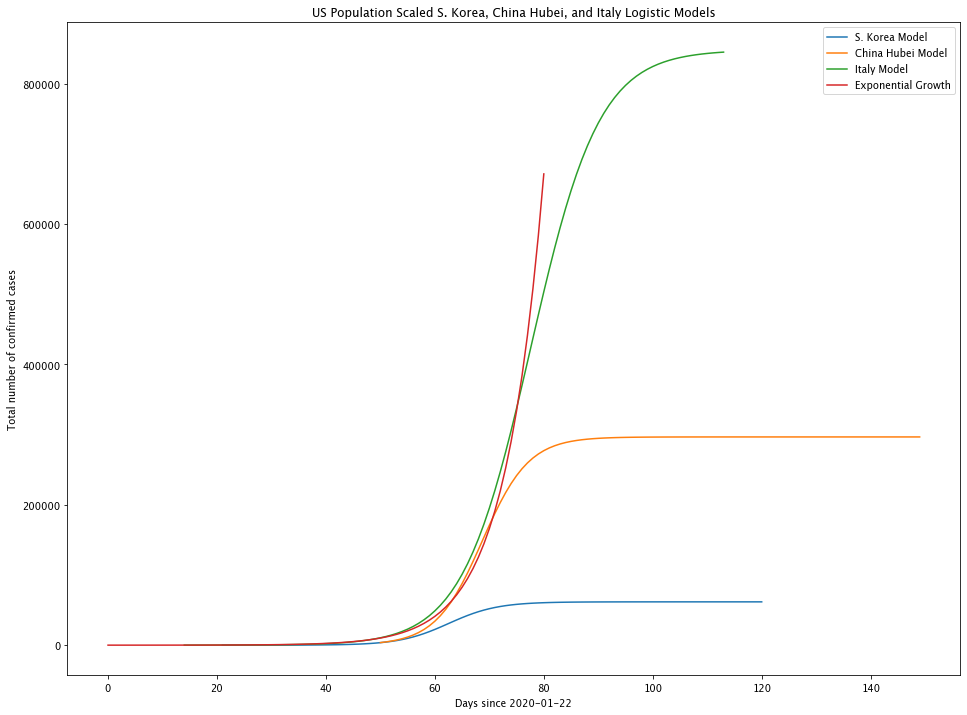

In [95]:
day_offset = 17
x_us = df_us.index
y_us = df_us['Cases']
x_ext = np.arange(100)
plt.figure(figsize=(16,12))

# Fitted logistic curve
plt.plot(x_ext+sk_day_offset, [logistic_model(i, popt_sk[0], popt_sk[1], popt_sk[2]*us_sk_pop_factor) for i in x_ext], label="S. Korea Model" )
plt.plot(x_ext+ch_hb_day_offset, [logistic_model(i, popt_ch_hb[0], popt_ch_hb[1], popt_ch_hb[2]*us_china_hubei_pop_factor) for i in x_ext], label="China Hubei Model" )
plt.plot(x_ext+italy_day_offset_day_offset, [logistic_model(i, popt_it[0], popt_it[1], popt_it[2]*us_italy_pop_factor) for i in x_ext], label="Italy Model" )
plt.plot(x_ext_exp, 1.15**(x_ext_exp+16), label="Exponential Growth")
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('US Population Scaled S. Korea, China Hubei, and Italy Logistic Models')
plt.savefig('US Population Scaled S. Korea, China Hubei, and Italy Logistic Models.png')
plt.show()

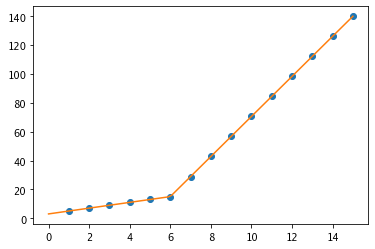

In [96]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15], dtype=float)
y = np.array([5, 7, 9, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 84.47, 98.36, 112.25, 126.14, 140.03])

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, 15, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))

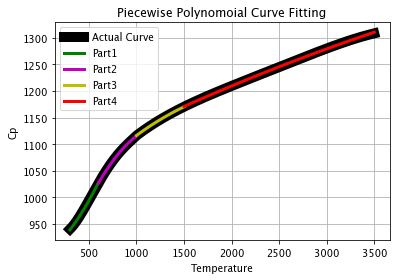

In [97]:
#Piece-Wise Polynomial Curve Fitting Degree (1-5)

# 1) Importing Libraries/Modules
import matplotlib.pyplot as plt  					#for plotting
import numpy as np      					        #for creating array
from scipy.optimize import curve_fit as cf 			#for the curve fit function


# 2) Extracting Data

def file_reader():

	temp=[]
	cp=[]
	for line in open('data_pw','r'):
		temp_cp = line.split(',')
		temp.append(int(temp_cp[0]))
		cp.append(float(temp_cp[1]))
	return temp,cp

T,CP = file_reader()

# 3) Creating Fucntions for the fit 

def poly1(t,A,B):
	return A*t + B

def poly2(t,A,B,C):
	return A*pow(t,2) + B*t + C

''' 
If there exists a part in the curve where it behaves exponentially, then the defition could be like:
def expo(t,A,B,C):
	return A*np.exp(-B*t) + C
Similarly any equation that seems to fit can be passed to the curve_fit function according to the need.
'''


# 4) Splitting the data into ranges 


# 	4.1) Part1 T = 300-600

function1=poly2 	 #calls on the desired function
T300_600=T[:300]	 #uses only the first 300 values
CP300_600=CP[:300]

T1 = np.linspace(300,600,300) 	           #creates a line space equal to the length of T300_600
p1, p2 = cf(function1,T300_600,CP300_600)  #p1= popt and p2 = pcov
fit300_600 = function1(T1,*p1)			   #gives the estimated equation for the set values


# 	4.2) Part2 T = 600-1000
function2 = poly2
T600_1000=T[300:700]
CP600_1000=CP[300:700]

T2 = np.linspace(600,1000,400)
p1, p2 = cf(function2,T600_1000,CP600_1000)
fit600_1000 = function2(T2,*p1)


# 	4.3) Part3 T = 1000-1500
function3 = poly2
T1000_1500=T[700:1200]
CP1000_1500=CP[700:1200]

T3 = np.linspace(1000,1500,500)
p1, p2 = cf(function2,T1000_1500,CP1000_1500)
fit1000_1500 = function3(T3,*p1)


# 	4.4) Part4 T= 1500-3499
function4 = poly2
T1500_=T[1200:]
CP1500_=CP[1200:]

T4 = np.linspace(1500,3500,2000)
p1, p2 = cf(function2,T1500_,CP1500_)
fit1500_ = function4(T4,*p1)


# 5) Plotting the Actual Curve and the 'Piecefits'

plt.plot(T,CP,'k',linewidth=10)           #Linewidth exaggerated for better visualisation
plt.plot(T1,fit300_600,'g', linewidth=3)
plt.plot(T2,fit600_1000,'m', linewidth=3)
plt.plot(T3,fit1000_1500,'y', linewidth=3)
plt.plot(T4,fit1500_,color='r', linewidth=3)
plt.legend(['Actual Curve', 'Part1','Part2','Part3','Part4'])
plt.xlabel('Temperature')
plt.ylabel('Cp')
plt.title('Piecewise Polynomoial Curve Fitting')
plt.grid()
plt.show()

In [98]:
from pykalman import KalmanFilter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=2)